<p style="font-family: Arial; font-size:3em;color:black;"> Lab Exercise 10</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(5)  # creating pseudo-random numbers for reproducibility

In [2]:
# Let's consider the following A_orig matrix:

A_orig = np.array([[4, 2, 4, 5, 4, 2, 2], [4, 4, 3, 2, 2, 5, 4], [4, 1, 4, 7, 3, 6, 2], [8 ,1, 2, 0, 5, 0, 7], [4 , 5, 8, 7, 6, 2, 3]],dtype=float)
M, N = 5, 7
print (pd.DataFrame(A_orig).head())

     0    1    2    3    4    5    6
0  4.0  2.0  4.0  5.0  4.0  2.0  2.0
1  4.0  4.0  3.0  2.0  2.0  5.0  4.0
2  4.0  1.0  4.0  7.0  3.0  6.0  2.0
3  8.0  1.0  2.0  0.0  5.0  0.0  7.0
4  4.0  5.0  8.0  7.0  6.0  2.0  3.0


In [3]:
# Let's add some NaN(s) to  A_orig matrix

A = A_orig.copy()
A[3][1] = np.NaN
A[4][6] = np.NaN

A_df = pd.DataFrame(A)
print (A_df.head())

     0    1    2    3    4    5    6
0  4.0  2.0  4.0  5.0  4.0  2.0  2.0
1  4.0  4.0  3.0  2.0  2.0  5.0  4.0
2  4.0  1.0  4.0  7.0  3.0  6.0  2.0
3  8.0  NaN  2.0  0.0  5.0  0.0  7.0
4  4.0  5.0  8.0  7.0  6.0  2.0  NaN


In [4]:
# Fine tune K value such that the (average percentage) error for the 2 missing elements is minimum.
# Remember: this is an exercise where we have the actual values for missing elements.
# In real-life scenarios missins elements are not known and you may need different metric(s)
# to assess the quality of your reconstructed matrix.
K = 1
#P = np.abs(np.random.uniform(low=0, high=8, size=(M, K)))
#Q = np.abs(np.random.uniform(low=0, high=8, size=(K, N)))
#P = np.divide(P, K*P.max())
#Q = np.divide(Q, K*Q.max())
k_values = range(1, 25)
e_values = []


In [5]:
def matrix_factorization(Rating_Matrix, P, Q, K, steps, alpha=0.001, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(Rating_Matrix)):
            for j in range(len(Rating_Matrix[i])):
                if ~np.isnan(Rating_Matrix[i][j]):
                    eij = Rating_Matrix[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eRating_Matrix = np.dot(P,Q)
        e = 0
        for i in range(len(Rating_Matrix)):
            for j in range(len(Rating_Matrix[i])):
                if ~np.isnan(Rating_Matrix[i][j]):
                    e = e + pow(Rating_Matrix[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        #print("Total error at step", step, "is", e)
        if e < 0.0001:
            break
    #print('Error:', e)
    e_values.append(e)

    return P, Q.T

In [6]:
for k in k_values:
    #print('for K =', k)
    P = np.abs(np.random.uniform(low=0, high=8, size=(M, k)))
    Q = np.abs(np.random.uniform(low=0, high=8, size=(k, N)))
    P = np.divide(P, k*P.max())
    Q = np.divide(Q, k*Q.max())
    eP, eQ = matrix_factorization(A, P, Q.T, k, steps = 1000)
    eA = np.matmul(eP, eQ.T)


    #print('Original rating matrix is:',A)
    #print('\n')
    #print('Rating matrix is:',eA)
print(e_values)

[116.91317404852992, 37.686319153080625, 10.837498538322373, 4.710322608015724, 4.649142324314855, 4.746295091335945, 4.704450213702675, 4.66696230204225, 4.693168862666429, 4.679229358895617, 4.672016615331818, 4.718951443736649, 4.6929397521872325, 4.686900253170201, 4.679439464605262, 4.693210955563602, 4.689853413668612, 4.701342567093065, 4.706036083696778, 4.69233611613033, 4.697115328745132, 4.711104132078934, 4.6897734960145065, 4.696040106661212]


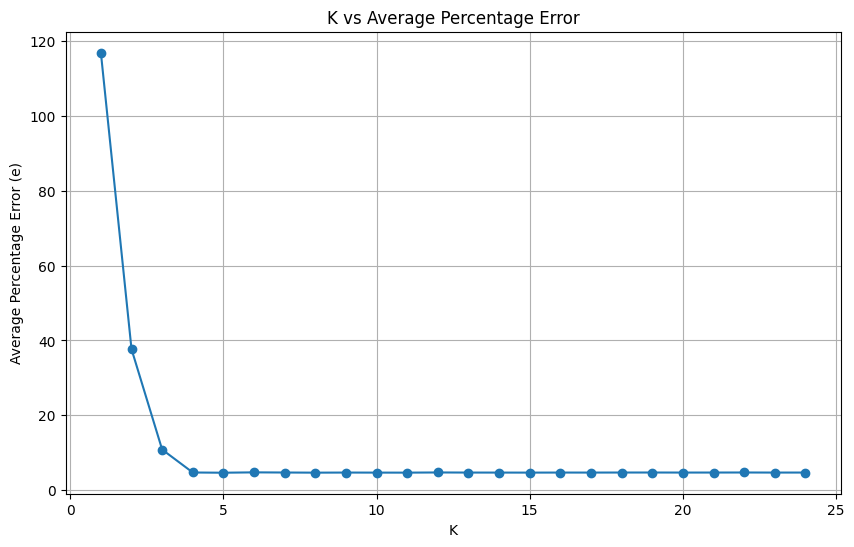

In [7]:
# Plotting K against e
plt.figure(figsize=(10, 6))
plt.plot(k_values, e_values, marker='o')
plt.xlabel('K')
plt.ylabel('Average Percentage Error (e)')
plt.title('K vs Average Percentage Error')
plt.grid(True)
plt.show()

### Lowest error rate seen when k = 5